#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout, LSTM, Dense
from tensorflow.keras.models import Sequential

#### Reading dataset

In [2]:
dataset = pd.read_csv('HistoricalPrices.csv')
dataset.head()

,Date,Open,High,Low,Close,Volume
0,12-05-17,995.94,1020.61,988.28,1005.15,2067318.0
1,12-04-17,1012.66,1016.10,995.57,998.68,1906439.0
2,12-01-17,1015.80,1022.49,1002.02,1010.17,1909566.0
3,11/30/17,1022.37,1028.49,1015.00,1021.41,1724031.0
4,11/29/17,1042.68,1044.08,1015.65,1021.66,2459426.0


### Preprocessing and Feature Extraction

In [3]:
dataset = dataset['Open'].values

#### Splitting dataset

In [4]:
dataset = dataset.reshape(-1, 1)
dataset_train = np.array(dataset[:int(dataset.shape[0]*0.8)])
dataset_test = np.array(dataset[int(dataset_train.shape[0])-50:])

#### Shrinking data range betw 0 to 1

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.fit_transform(dataset_test)

#### Creating timesteps for LSTM 
Assume x contain every next 50 values from dataset and 51st be its prediction for next day in y

In [6]:
def create_timestep(dataset):
    daily_val = []
    nextday_val = []
    for i in range(50, len(dataset)):
        daily_val.append(dataset[i-50:i, 0])
        nextday_val.append(dataset[i, 0])
    daily_val = np.array(daily_val)
    nextday_val = np.array(nextday_val)
    return daily_val, nextday_val

In [7]:
X_train, y_train = create_timestep(dataset_train)
X_test, y_test = create_timestep(dataset_test)

#### Reshaping features 

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#### Training model using LSTM

In [9]:
model = Sequential()
model.add(LSTM(units=115, return_sequences=True, input_shape=(X_train.shape[1], 1))) # no of timesteps & feature
model.add(Dropout(0.3))
model.add(LSTM(units=115, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=115, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=115))
model.add(Dropout(0.2))
model.add(Dense(units=1))   # for output
model.compile(loss='mean_squared_error', optimizer='adam') # compiling

In [10]:
model.fit(X_train, y_train, epochs=20, verbose=1, batch_size=70)

Epoch 1/20
692/692 [==============================] - 8s 12ms/sample - loss: 0.0650
Epoch 2/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0141
Epoch 3/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0079
Epoch 4/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0052
Epoch 5/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0051
Epoch 6/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0041
Epoch 7/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0038
Epoch 8/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0036
Epoch 9/20
692/692 [==============================] - 6s 9ms/sample - loss: 0.0035
Epoch 10/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0039
Epoch 11/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0034
Epoch 12/20
692/692 [==============================] - 6s 8ms/sample - loss: 0.0038


#### Predictions

In [12]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_ = scaler.inverse_transform(y_test.reshape(-1, 1))

#### Visualizing Results

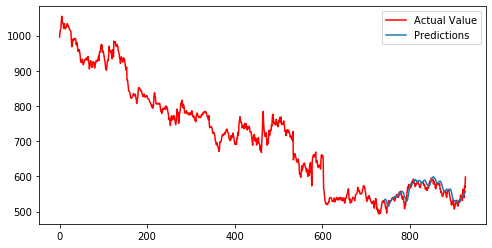

In [15]:
fig, ax = plt.subplots(figsize=(9,5))
plt.plot(dataset, label="Actual Value")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, label='Predictions')
plt.legend()

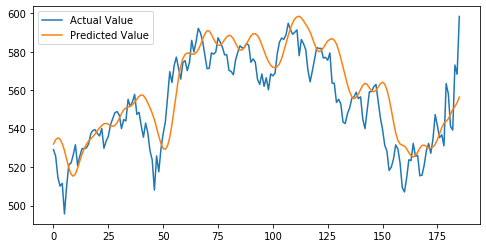

In [16]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(y_test_, label='Actual Value')
plt.plot(predictions, label='Predicted Value')
plt.legend()